## 问答题
1. 支持向量机的基本思想是什么？
寻找最宽的街道，使得街道的宽度最大化，同时兼容软间隔分类，对于分类问题会将街道内和完全分类错误的向量进行惩罚，对于回归问题，会将街道外的向量进行惩罚
2. 什么是支持向量？
支持向量是决定超平面的样本点，对于分类边界起到决定性作用，移除或添加非支持向量是不会对训练结果产生影响
3. 在使用 SVM 时，缩放输入值为什么很重要？
重要，对于SVM而言，大尺度的特征会决定走向
4. SVM 分类器在对实例进行分类时能输出置信度分数吗？概率呢？
能，可以输出样本到超平面的距离，概率可以用probability = True来进行输出
5. 你如何在 LinearSVC、SVC 和 SGDClassifier 之间进行选择？
在小规模的训练集下，当问题是线性可分，选linearsvc ， 当问题线性不可分的情况下选择SVC，而训练集很大时，sgdclassfier是支持核外技巧的
6. 假设你已经使用 RBF 核训练了一个 SVM 分类器，但它似乎欠拟合训练集。
   你应该增大还是减小 γ（gamma）？C 呢？
全都怎加，增加C会缩小街道那么会有更多的支持向量，降低正则化强度，增加$\gamma$ 决策边界会围绕实例进行绕圈增加方差
7. ε 不敏感模型是什么意思？
对于回归问题而言，对于街道内的样本点是不会影响最终的训练结果过的（非支持向量），这种的称为$\epsilon$ 不敏感模型
8. 使用核技巧有什么意义？
可以在不增加特征的情况下将数据映射到高维空间，降低运算成本

## 编程题
1. 在葡萄酒数据集上训练SVM分类器，可以使用sklearn.datasets.load_wine()加载它。该数据集包含3个不同种植者生产的178个葡萄酒样本的化学分析：目标是训练一个分类模型，该模型能够根据葡萄酒的化学分析预测种植者。由于SVM分类器是二元分类器，将需要使用“一对全部”对所有三个类进行分类。能达到的精度是多少？

   "一对全部"可以复习 **8_sklearn做分类.ipynb**里的笔记，里面提到了用二元分类器做多分类问题

---

2. 提前预习 **10_支持向量机.ipynb** 最新更新的笔记 （把SVM分类用梯度下降实现）； 大概理解笔记后，尝试自己对照笔记 实现用梯度下降实现SVM分类

   并把自定义的SVM分类用于 iris data(鸢尾花数据)； 取花瓣长度 和 花瓣宽度特征， 分类 看是不是 分类2的花 （(iris.target == 2)

   对比下sklearn自带的SVM分类 和 自定义SVM分类 实现的分类效果



In [1]:
import sklearn.datasets
from sklearn.compose import ColumnTransformer
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.multiclass import OneVsRestClassifier



data = sklearn.datasets.load_wine()

In [2]:
# 先看一下数据
list(data)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

In [3]:
data.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [4]:
data.data[:5]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03],
       [1.437e+01, 1.950e+00, 2.500e+00, 1.680e+01, 1.130e+02, 3.850e+00,
        3.490e+00, 2.400e-01, 2.180e+00, 7.800e+00, 8.600e-01, 3.450e+00,
        1.480e+03],
       [1.324e+01, 2.590e+00, 2.870e+00, 2.100e+01, 1.180e+02, 2.800e+00,
        2.690e+00, 3.900e-01, 1.820e+00, 4.320e+00, 1.040e+00, 2.930e+00,
        7.350e+02]])

In [5]:
print(data.target)
len(data.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


178

In [6]:
import numpy as np
np.isnan(data.data)
np.all(np.isnan(data.data),axis=0,keepdims=True)
# data.data.dtype

array([[False, False, False, False, False, False, False, False, False,
        False, False, False, False]])

In [7]:
# todo:划分训练测试集
X = data.data
y = data.target
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
np.unique(y,return_counts=True)

(array([0, 1, 2]), array([59, 71, 48], dtype=int64))

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline,make_pipeline
# from sklearn.impute import SimpleImputer        # 虽然没有缺失值，填充缺失值没用但还是带上了
from sklearn.svm import SVC , LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
onevsrest = OneVsRestClassifier(SVC(kernel='linear'))
pipeline = Pipeline([('scaler', StandardScaler()),
                     ('svm', OneVsRestClassifier(SVC(kernel='linear',C=1,)))])
param_grid1 = {
        'svm__estimator__C': [0.1, 1, 10],
    }
param_grid2 ={
        'svm__estimator__kernel': ['rbf','poly'],
        'svm__estimator__gamma': [1e-1, 1e-2, 1e-3, 1e-4],
        'svm__estimator__C': [0.1, 1, 10],

    }

grid_search1 = GridSearchCV(pipeline, param_grid=param_grid1,return_train_score=True)
grid_search2 = GridSearchCV(pipeline, param_grid=param_grid2,return_train_score=True)


In [11]:
grid_search1.fit(X_train, y_train)
grid_search2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm',
                                        OneVsRestClassifier(estimator=SVC(C=1,
                                                                          kernel='linear')))]),
             param_grid={'svm__estimator__C': [0.1, 1, 10],
                         'svm__estimator__gamma': [0.1, 0.01, 0.001, 0.0001],
                         'svm__estimator__kernel': ['rbf', 'poly']},
             return_train_score=True)

In [16]:
grid_search1.best_params_,grid_search1.best_score_

({'svm__estimator__C': 1}, 0.9790640394088671)

In [13]:
grid_search1.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm',
                 OneVsRestClassifier(estimator=SVC(C=1, kernel='linear')))])

In [17]:
grid_search2.best_params_,grid_search2.best_score_
# grid_search2.best_estimator_

({'svm__estimator__C': 10,
  'svm__estimator__gamma': 0.01,
  'svm__estimator__kernel': 'rbf'},
 0.9788177339901478)

In [26]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score
for i in (grid_search1,grid_search2):
    print(f"grid_search1.best_params_: {i.best_params_}")
    accuracy = accuracy_score(y_test,i.best_estimator_.predict(X_test))
    # f1 = f1_score(y_test,i.best_estimator_.predict(X_test),average='macro')
    # auc = roc_auc_score(y_test,i.best_estimator_.predict(X_test),multi_class='ovr')
    print(i.best_estimator_.predict(X_test))
    print(y_test)
    print(f"accuracy_score: {accuracy}")
    # print(f"f1_score: {f1}")
    # print(f"auc: {auc}")
    print()

grid_search1.best_params_: {'svm__estimator__C': 1}
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
accuracy_score: 1.0

grid_search1.best_params_: {'svm__estimator__C': 10, 'svm__estimator__gamma': 0.01, 'svm__estimator__kernel': 'rbf'}
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
[0 0 2 0 1 0 1 2 1 2 0 2 0 1 0 1 1 1 0 1 0 1 1 2 2 2 1 1 1 0 0 1 2 0 0 0]
accuracy_score: 1.0



第二问

In [32]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C, eta0, n_epochs=1000, random_state=None):
        self.C = C
        self._alpha = 1 / (2*C)
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state

    @property
    def eta(self):
        return self.eta0

    def fit(self, X, y):
        # 随机初始化，可以联系到为什么很多类 会有 random_state这个参数
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1)  # n 个 特征权重
        b = 0

        t = np.array(y, dtype=np.float64).reshape(-1, 1) * 2 - 1  # 把 分类 0 和 分类 1 转成  分类-1 和分类 1
        self.Js = []   # 损失值列表
        m = X.shape[0]
        # 训练
        for epoch in range(self.n_epochs):
            support_vectors_idx = ((X@w + b)*t < 1).ravel()   # 找出支持向量 （损失值不为0的训练集实例， 当前街道内部/分类错误的训练集实例）
            X_sv = X[support_vectors_idx]
            t_sv = t[support_vectors_idx]

            J = (np.sum(w * w) * self._alpha +  np.sum(1- t_sv * (X_sv@w + b))) / m
            self.Js.append(J)

            w_gradient_vector = (2*self._alpha*w  - X_sv.T @ t_sv) / m
            b_derivative = - np.sum(t_sv) / m

            w = w - self.eta * w_gradient_vector
            b = b - self.eta * b_derivative


        self.intercept_ = b
        self.coef_ = w
        support_vectors_idx = ((X@w + b)*t < 1).ravel()
        self.support_vectors_ = X[support_vectors_idx]
        return self

    def decision_function(self, X):
        return X.dot(self.coef_) + self.intercept_

    def predict(self, X):
        return self.decision_function(X) >= 0


In [16]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)

In [17]:
iris.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [42]:
X = iris.data.loc[:,["petal length (cm)","petal width (cm)"]]
y = iris.target==2
X
y +=0
y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: target, Length: 150, dtype: int32

In [39]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score,train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
svm_clf = LinearSVC(C=1,random_state=42,max_iter=10000,dual=True)
svm_clf_pipeline = make_pipeline(StandardScaler(),svm_clf)
mylinear_clf_pipeline = make_pipeline(StandardScaler(),MyLinearSVC(C=1,eta0=.1,n_epochs=10000,random_state=42))



In [44]:
svm_clf_pipeline.fit(X_train,y_train)
mylinear_clf_pipeline.fit(X_train,y_train)
print(svm_clf_pipeline.predict(X_test))
print(mylinear_clf_pipeline.predict(X_test).flatten()+ 0)
print(y_test.ravel())
np.all(svm_clf_pipeline.predict(X_test) == mylinear_clf_pipeline.predict(X_test).flatten()+ 0)

[0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 1 1 1 0 0]


True

3. 在加州房屋数据集上训练和微调SVM回归器。可以使用原始数据集而不是 在课上使用的调整后的版本，
可以使用sklearn.datasets.fetch_california_housing()加载它。目标代表了数十万美元。
由于有超过20000个实例，SVM可能会很慢，因此对于超参数调整，应该使用更少的实例（例如2000个）来测试更多的超参数组合。最佳模型的RMSE是多少？

In [1]:
import pandas as pd
housing = pd.read_csv("./datas/california_housing_train.csv")

In [2]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [11]:
from sklearn.datasets import fetch_california_housing
housing_data=fetch_california_housing(as_frame=True)

In [14]:
list(housing_data)

['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR']

In [16]:
housing_data.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [3]:


housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


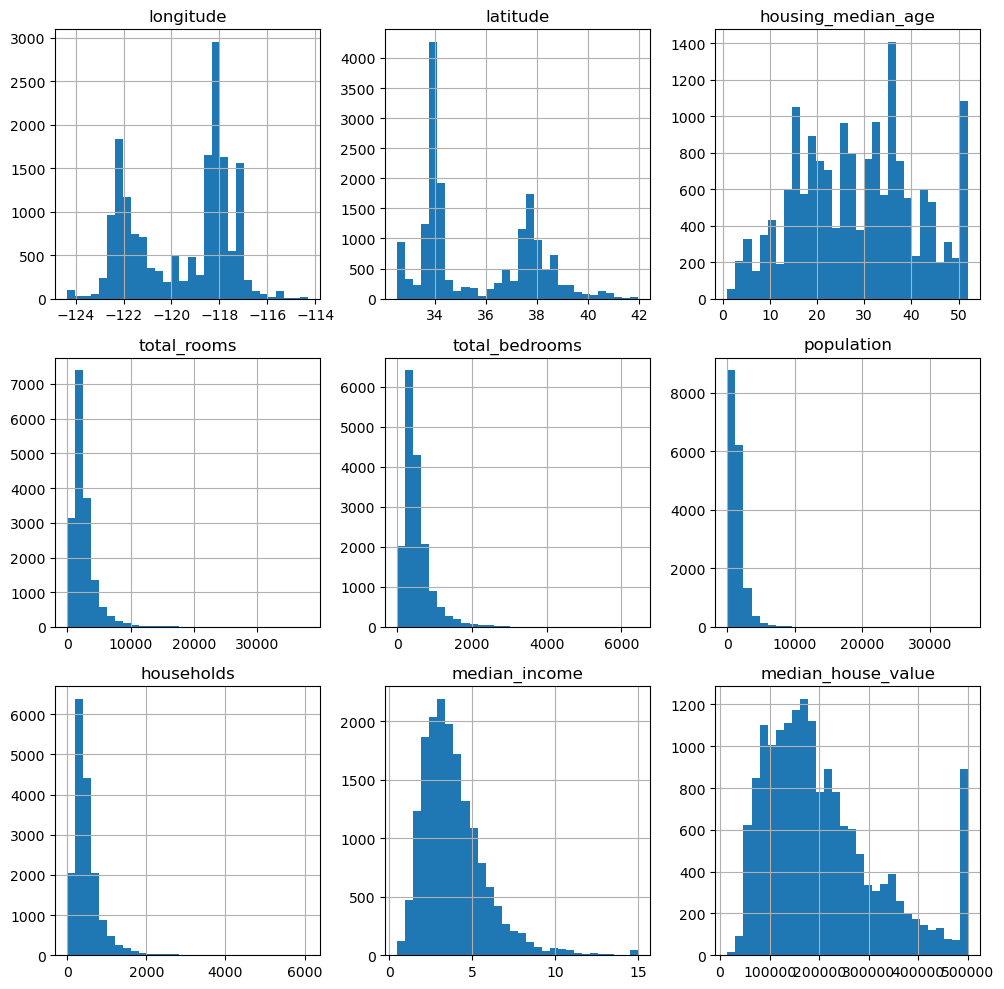

In [4]:
from matplotlib import pyplot as plt
housing.hist(bins=30,figsize=(10,10))
plt.tight_layout()
plt.show()

In [5]:
from  sklearn.base import BaseEstimator,TransformerMixin
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.cluster import KMeans

class geo_processing(BaseEstimator,TransformerMixin):
    def __init__(self,n_cluster=10,gamma = 1.0,random_state=None):
        """n_cluster: 集群中心数量
        random_state: 随机种子数
        gamma: 与集群中心相似度的衰减成都"""
        self.n_cluster = n_cluster
        self.random_state = random_state
        self.gamma = gamma

    def fit(self,X,y=None,sample_weight=None):
        self.kmeans_ = KMeans(self.n_cluster,random_state=self.random_state,n_init="auto")
        self.kmeans_.fit(X,sample_weight=sample_weight)
        return self

    def transform(self,X,y=None):
        return rbf_kernel(X,self.kmeans_.cluster_centers_,gamma=self.gamma)



In [6]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer
from sklearn.pipeline import Pipeline,make_pipeline
import numpy as np
log_col = ["total_rooms","total_bedrooms","households","population","median_income"]

log_pipeline = make_pipeline(FunctionTransformer(np.log),StandardScaler())
default_num_ = make_pipeline(StandardScaler())

combined_pipeline = ColumnTransformer([
    ("geo" , geo_processing(),["longitude","latitude"]),
    ("log",log_pipeline,log_col),
],remainder=default_num_)

In [7]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV,train_test_split
X = housing.iloc[:,:-1]
y = housing.iloc[:,-1]
X
y
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2 , random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

In [8]:
full_pipeline = Pipeline([
    ("preprocessing" , combined_pipeline),
    ("svm_reg" , SVR(kernel='linear',C=1)),
])

grid_params = [{
    "svm_reg__kernel": ["rbf","poly",],
    "svm_reg__C": [0.1, 1, 10],
    "svm_reg__gamma": ["scale",1e-1, 1,],
    "svm_reg__degree": [2,3,4],
},{
    "svm_reg__kernel": ["linear",],
    "svm_reg__C": [0.1, 1, 10],
},
]

grid_search = GridSearchCV(full_pipeline,param_grid=grid_params,cv=5,scoring="neg_mean_squared_error")



In [10]:
grid_search.fit(X_train[:2000],y_train[:2000])

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('geo',
                                                                         geo_processing(),
                                                                         ['longitude',
                                                                          'latitude']),
                                                                        ('log',
                                                                         Pipeline(steps=[('functiontransformer',
                                                                                          FunctionTransformer(func=<ufunc 'log'>)),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         ['total_rooms',
                                                                          'total_bedrooms',
                                                                          'households',
                                                                          'population',
                                                                          'median_income'])])),
                                       ('svm_reg', SVR(C=1, kernel='linear'))]),
             param_grid=[{'svm_reg__C': [0.1, 1, 10],
                          'svm_reg__degree': [2, 3, 4],
                          'svm_reg__gamma': ['scale', 0.1, 1],
                          'svm_reg__kernel': ['rbf', 'poly']},
                         {'svm_reg__C': [0.1, 1, 10],
                          'svm_reg__kernel': ['linear']}],
             scoring='neg_mean_squared_error')

In [12]:
grid_search.best_estimator_
grid_search.best_score_

-9937403994.111721

In [13]:
from sklearn.metrics import mean_squared_error
best_estimator_ = grid_search.best_estimator_
best_estimator_.fit(X_train,y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder=Pipeline(steps=[('standardscaler',
                                                              StandardScaler())]),
                                   transformers=[('geo', geo_processing(),
                                                  ['longitude', 'latitude']),
                                                 ('log',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<ufunc 'log'>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['total_rooms',
                                                   'total_bedrooms',
                                                   'households', 'population',
                                                   'median_income'])])),
                ('svm_reg', SVR(C=10, gamma=1, kernel='poly'))])

In [14]:
y_pred = best_estimator_.predict(X_test)

In [15]:
mean_squared_error(y_test,y_pred)

6711378095.934111

In [ ]:
SVR()